# **Mental Health Analysis**



## **Data Analysis**

In [ ]:
# Importing necessary libraries
import pandas as pd # for data manipulation
import numpy as np #for performing numeric task in the dataset

import seaborn as sns;  #for visualization and finding the patterns
import matplotlib.pyplot as plt; #for visualization and finding the patterns
import plotly.express as px   #for visulalization and finding the patterns in 3D visualization
from sklearn.tree import plot_tree #For plottign decision Tree

from sklearn.preprocessing import LabelEncoder #for encoading the String value to numerical
from sklearn.model_selection import train_test_split #For splitting the data into training and testing set

from sklearn.ensemble import RandomForestClassifier  #For performing RandomForestClassification Algorithm
from sklearn.linear_model import LogisticRegression   #For performing LogisticRegression Algorithm
from sklearn.tree import DecisionTreeClassifier   #For performing DecisionTreeClassifier Algorithm
from xgboost import XGBClassifier   #For performing XGBClassifier Algorithm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #For performing the output test











In [ ]:
# For mounting the drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading dataset from drive and define in df variable

# df = pd.read_csv('/content/drive/MyDrive/mental health analysis/Mental_health_dataset.csv')
df = pd.read_csv('/content/drive/MyDrive/ml/Mental_health_dataset.csv')

In [ ]:
df.head(5) #show top 5 data

,S.N,District_Name,Zone,Ecological_Belt,Development_Region,Year_BS,Year_AD,condition,type,Male,Female,Age,Married,Unmarried,Education,Employment,lat,long
0,0,Taplejung,Mechi,Mountain,Eastern,2069,2012,Severe,Dipression,26,24,19,27,23,"Some College, short continuing education or eq...",no,27.618589,87.856661
1,1,Taplejung,Mechi,Mountain,Eastern,2069,2012,Severe,Psychosis,53,30,50,57,26,None,yes,27.618589,87.856661
2,2,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Anxiety (Neurosis),24,32,21,37,19,#####,yes,27.618589,87.856661
3,3,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Mental retardation,48,46,20,51,43,"College degree, bachelor, master",yes,27.618589,87.856661
4,4,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Conversive disorder (Hysteria),49,29,60,45,33,#####,retired,27.618589,87.856661


In [ ]:
df.tail(5) #show 5 data of bottom

,S.N,District_Name,Zone,Ecological_Belt,Development_Region,Year_BS,Year_AD,condition,type,Male,Female,Age,Married,Unmarried,Education,Employment,lat,long
2620,2620,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Minor,Anxiety (Neurosis),47,41,53,47,41,"College degree, bachelor, master",yes,29.892711,80.741361
2621,2621,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Severe,Mental retardation,18,22,38,24,16,"College degree, bachelor, master",no,29.892711,80.741361
2622,2622,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Severe,Conversive disorder (Hysteria),27,30,18,5,52,Up to 12 years of school,no,29.892711,80.741361
2623,2623,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Normal,Alcoholism,55,36,60,33,58,"College degree, bachelor, master",#####,29.892711,80.741361
2624,2624,Darchula,Mahakali,Mountain,Far-Western,2077,2020,Normal,Epilesy,39,30,24,48,21,"College degree, bachelor, master",yes,29.892711,80.741361


In [ ]:
df.info() # checking the information of dataset like data-type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625 entries, 0 to 2624
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.N                 2625 non-null   int64  
 1   District_Name       2625 non-null   object 
 2   Zone                2625 non-null   object 
 3   Ecological_Belt     2625 non-null   object 
 4   Development_Region  2625 non-null   object 
 5   Year_BS             2625 non-null   int64  
 6   Year_AD             2625 non-null   int64  
 7   condition           2625 non-null   object 
 8   type                2625 non-null   object 
 9   Male                2625 non-null   int64  
 10  Female              2625 non-null   int64  
 11  Age                 2625 non-null   int64  
 12  Married             2625 non-null   int64  
 13  Unmarried           2625 non-null   int64  
 14  Education           2625 non-null   object 
 15  Employment          2625 non-null   object 
 16  lat   

In [ ]:
df.dtypes #checking the datatype of each column

S.N                     int64
District_Name          object
Zone                   object
Ecological_Belt        object
Development_Region     object
Year_BS                 int64
Year_AD                 int64
condition              object
type                   object
Male                    int64
Female                  int64
Age                     int64
Married                 int64
Unmarried               int64
Education              object
Employment             object
lat                   float64
long                  float64
dtype: object

info() function is used to check null values,total values and datatypes of each columns so there are 18 columns in our dataset along with their null values and datatypes

In [ ]:
df.describe() # It provides a quick statistical summary of the numerical columns in a DataFrame.

,S.N,Year_BS,Year_AD,Male,Female,Age,Married,Unmarried,lat,long
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,1312.000000,2071.862857,2014.862857,39.217143,38.765333,38.762286,37.357333,40.625143,28.003789,84.254905
std,757.916552,2.568618,2.568618,12.639741,12.423508,12.513433,13.006108,21.568092,0.885817,2.170864
min,0.000000,2069.000000,2012.000000,18.000000,18.000000,18.000000,1.000000,-6.000000,26.571975,80.382090
25%,656.000000,2070.000000,2013.000000,28.000000,28.000000,28.000000,27.000000,25.000000,27.218320,82.359404
50%,1312.000000,2071.000000,2014.000000,39.000000,38.000000,39.000000,38.000000,40.000000,27.948879,84.235742
75%,1968.000000,2074.000000,2017.000000,51.000000,50.000000,50.000000,48.000000,55.000000,28.692376,86.007220
max,2624.000000,2077.000000,2020.000000,60.000000,60.000000,60.000000,60.000000,108.000000,30.035133,87.955321


These are the statistics summary such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the column having numeric data-type.

In [ ]:
df.isna().sum() # checking for missing or NA values in a DataFrame or Series.

S.N                   0
District_Name         0
Zone                  0
Ecological_Belt       0
Development_Region    0
Year_BS               0
Year_AD               0
condition             0
type                  0
Male                  0
Female                0
Age                   0
Married               0
Unmarried             0
Education             0
Employment            0
lat                   0
long                  0
dtype: int64

isnull is checking the null values present in each columns and sum add all the null
values in that particular columns and prints out the results

In [ ]:
# Renaming the columns
df = df.rename(columns={'condition': 'Condition', 'type': 'Type', 'lat': 'Latitude', 'long': 'Longitude'})
df.head()

,S.N,District_Name,Zone,Ecological_Belt,Development_Region,Year_BS,Year_AD,Condition,Type,Male,Female,Age,Married,Unmarried,Education,Employment,Latitude,Longitude
0,0,Taplejung,Mechi,Mountain,Eastern,2069,2012,Severe,Dipression,26,24,19,27,23,"Some College, short continuing education or eq...",no,27.618589,87.856661
1,1,Taplejung,Mechi,Mountain,Eastern,2069,2012,Severe,Psychosis,53,30,50,57,26,None,yes,27.618589,87.856661
2,2,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Anxiety (Neurosis),24,32,21,37,19,#####,yes,27.618589,87.856661
3,3,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Mental retardation,48,46,20,51,43,"College degree, bachelor, master",yes,27.618589,87.856661
4,4,Taplejung,Mechi,Mountain,Eastern,2069,2012,Major,Conversive disorder (Hysteria),49,29,60,45,33,#####,retired,27.618589,87.856661


renaming columns names for convinent

In [ ]:
duplicate = df.duplicated().sum() # checking duplicate value
duplicate

0

We can see the output is '0' i.e there are no duplicate values.

### checking unique values and Correction
It is used to obtain a Series containing counts of unique values in a specific column of a DataFrame. It's particularly useful for understanding the distribution of categorical data in a column.

In [ ]:
# Checking the unique value in District_Name column
df['District_Name'].unique()

array(['Taplejung', 'Panchthar', 'Ilam', 'Jhapa', 'Morang', 'Sunsari',
       'Dhankuta', 'Teharthum', 'Sankhuwasabha', 'Bhojpur', 'Solukhumbu',
       'Okhaldhunga', 'Khotang', 'Udaypur', 'Saptari', 'Siraha',
       'Dhanusha', 'Mahottari', 'Sarlahi', 'Sindhuli', 'Ramechhap',
       'Dolkha', 'Sindhupalchowk', 'Kavre', 'Lalitpur', 'Bhaktapur',
       'Kathmandu', 'Nuwakot', 'Rasuwa', 'Dhading', 'Makawanpur',
       'Rautahat', 'Bara', 'Parsa', 'Chitwan', 'Gorkha', 'Lamjung',
       'Tanahu', 'Syangja', 'Kaski', 'Manang', 'Mustang', 'Myagdi',
       'Parbat', 'Baglung', 'Gulmi', 'Palpa', 'Nawalparasi', 'Rupandehi',
       'Kapilvastu', 'Arghakhanchi', 'Pyuthan', 'Rolpa', 'Rukum',
       'Salyan', 'Dang', 'Banke', 'Bardiya', 'Surkhet', 'Dailekh',
       'Jajarkot', 'Dolpa', 'Jumla', 'Kalikot', 'Mugu', 'Humla', 'Bajura',
       'Bajhang', 'Achham', 'Doti', 'Kailali', 'Kanchanpur', 'Dadeldhura',
       'Baitadi', 'Darchula'], dtype=object)

In [ ]:
# Checking the unique value with its sum in District_Name column
df['District_Name'].value_counts()

Taplejung         35
Banke             35
Salyan            35
Rukum             35
Rolpa             35
                  ..
Lalitpur          35
Kavre             35
Sindhupalchowk    35
Dolkha            35
Darchula          35
Name: District_Name, Length: 75, dtype: int64

In [ ]:
# Checking Unique value in Zone column
df['Zone'].unique()

array(['Mechi', 'Kosi', 'Sagarmatha', 'Janakpur', 'Bagmati', 'Narayani',
       'Gandaki', 'Dhawalagiri', 'Lumbini', 'Rapti', 'Bheri', 'Karnali',
       'Seti', 'Mahakali'], dtype=object)

In [ ]:
# Checking unique value with their count
df['Zone'].value_counts()

Bagmati        280
Kosi           210
Sagarmatha     210
Janakpur       210
Gandaki        210
Lumbini        210
Narayani       175
Rapti          175
Bheri          175
Karnali        175
Seti           175
Mechi          140
Dhawalagiri    140
Mahakali       140
Name: Zone, dtype: int64

In [ ]:
df['Ecological_Belt'].unique()

array(['Mountain', 'Hill', 'Terai'], dtype=object)

In [ ]:
# Checking Unique value with Their count in Ecological_Belt
df['Ecological_Belt'].value_counts()

Hill        1365
Terai        700
Mountain     560
Name: Ecological_Belt, dtype: int64

In [ ]:
df['Development_Region'].unique()

array(['Eastern', 'Central', 'Western', 'Mid-Western', 'Far-Western'],
      dtype=object)

In [ ]:
# checking unique value with their count in Development_Region column
df['Development_Region'].value_counts()

Central        665
Eastern        560
Western        560
Mid-Western    525
Far-Western    315
Name: Development_Region, dtype: int64

In [ ]:
df['Condition'].unique()

array(['Severe', 'Major', 'Normal', 'Minor'], dtype=object)

In [ ]:
# checking unique value with count in Condition column
df['Condition'].value_counts()

Normal    672
Major     666
Severe    657
Minor     630
Name: Condition, dtype: int64

In [ ]:
df['Type'].unique()

array(['Dipression', 'Psychosis', 'Anxiety (Neurosis)',
       'Mental retardation', 'Conversive disorder (Hysteria)',
       'Alcoholism', 'Epilesy'], dtype=object)

In [ ]:
# checking unique value with count in Type column
df['Type'].value_counts()

Dipression                        375
Psychosis                         375
Anxiety (Neurosis)                375
Mental retardation                375
Conversive disorder (Hysteria)    375
Alcoholism                        375
Epilesy                           375
Name: Type, dtype: int64

In [ ]:
# chceking the unique value
df['Age'].unique()

array([19, 50, 21, 20, 60, 27, 28, 58, 37, 59, 29, 47, 22, 45, 43, 51, 35,
       40, 49, 56, 57, 41, 55, 54, 25, 48, 26, 23, 42, 33, 36, 31, 46, 52,
       30, 18, 38, 39, 24, 32, 53, 34, 44])

In [ ]:
# sorting Age column, according to ascending order
df['Age'].value_counts().sort_index(ascending=True)

18    60
19    61
20    83
21    56
22    79
23    55
24    44
25    66
26    78
27    57
28    65
29    74
30    65
31    46
32    58
33    49
34    46
35    83
36    41
37    74
38    52
39    54
40    72
41    70
42    57
43    74
44    51
45    50
46    49
47    68
48    43
49    67
50    66
51    73
52    51
53    76
54    48
55    58
56    71
57    54
58    65
59    66
60    50
Name: Age, dtype: int64

As we can see in age the minimum age is 18 and maximum age is 60. So, Dividing it according to standard age group i.e.
**Child:** 0-13 years
**Teenager:** 13-20 years
**Young:** 20-41 years
**Adult:** 41-61 years
**Elder:** 61-80 years
**Old:** 80 and above age.

In [ ]:
# checking the unique value
df['Education'].unique()

array(['Some College, short continuing education or equivalent', 'None',
       '#####', 'College degree, bachelor, master', 'PhD/Doctorate',
       '######', 'Up to 12 years of school', '#######', 'Na/na',
       'Up to 9 years of school', 'none', 'na/na', '####'], dtype=object)

In [ ]:
# checking unique value with their value count
df['Education'].value_counts()

College degree, bachelor, master                          1522
PhD/Doctorate                                              544
Up to 9 years of school                                    135
Up to 12 years of school                                   133
Some College, short continuing education or equivalent      52
#####                                                       46
######                                                      38
Na/na                                                       37
None                                                        35
na/na                                                       30
none                                                        27
#######                                                     24
####                                                         2
Name: Education, dtype: int64

In [ ]:
# chceking the unique value
df['Employment'].unique()

array(['no', 'yes', 'retired', '####', '######', '#######', '#####'],
      dtype=object)

In [ ]:
# checking unique value with their value count
df['Employment'].value_counts()

no         1395
yes         819
######      208
#####        76
retired      51
####         39
#######      37
Name: Employment, dtype: int64

In [ ]:
# checking unique value with their value count
df['Married'].value_counts().sort_index(ascending=True)

1     10
2     13
3     14
4      8
5      6
6      9
18    49
19    70
20    63
21    69
22    55
23    64
24    64
25    66
26    69
27    44
28    70
29    65
30    53
31    88
32    66
33    69
34    47
35    54
36    72
37    53
38    61
39    53
40    85
41    72
42    61
43    65
44    33
45    79
46    42
47    50
48    75
49    60
50    42
51    73
52    70
53    49
54    75
55    60
56    45
57    36
58    50
59    40
60    39
Name: Married, dtype: int64

In [ ]:
# checking unique value with their value count
df['Unmarried'].value_counts().sort_index(ascending=True)

-6       2
-3       2
-2       3
 0      40
 1      26
        ..
 99      2
 102     2
 105     2
 107     1
 108     2
Name: Unmarried, Length: 102, dtype: int64

As we can see there is negative value in Unmarried column which doesn't make any sense. So, these data needs to be dropped.

## **Data Cleaning**

In [ ]:
df = df[df['Unmarried'] >= 0].dropna(axis=0) # Dropping the rows having value less than 0.
df.shape # It shows No.Of row and columns

(2618, 18)

In [ ]:
# now less than 0 values in row are removed
df['Unmarried'].value_counts().sort_index(ascending=True)

0      40
1      26
2      21
3      17
4       6
       ..
99      2
102     2
105     2
107     1
108     2
Name: Unmarried, Length: 99, dtype: int64

In [ ]:
# Adding Male and Female column to make Total_victim column
df['Total_Victim'] = df['Male'] + df['Female']

In [ ]:
bins = [0, 13, 20, 41, 61, 80, float('inf')]  # Define age bins
labels = ['Child', 'Teenager', 'Young', 'Adult', 'Elder', 'Old']  # Define labels for each age group

# Create a new 'Age_Group' column using pd.cut
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'Age_Group' column
print(df[['Age', 'Age_Group']])

      Age Age_Group
0      19  Teenager
1      50     Adult
2      21     Young
3      20     Young
4      60     Adult
...   ...       ...
2620   53     Adult
2621   38     Young
2622   18  Teenager
2623   60     Adult
2624   24     Young

[2618 rows x 2 columns]


In [ ]:
# Replacing the Type name to make it convenient for understanding
df['Type'] = df['Type'].replace({'Anxiety (Neurosis)':'Neurosis', 'Conversive disorder (Hysteria)':'Hysteria'})

In [ ]:
# replacing variable
df['Education'] = df['Education'].replace({'College degree, bachelor, master':'University',
                                                 'PhD/Doctorate':'Ph.D',
                                                 'Up to 9 years of school':'Intermediate School',
                                                 'Up to 12 years of school':'High School',
                                                 'Some College, short continuing education or equivalent':'Educated'})

In [ ]:
# assigning null value in invalid informtion
df['Education'] = df['Education'].replace(['####', '#####', '######', '#######', 'Na/na', 'na/na', 'None', 'none'], np.nan)

In [ ]:
# showing total number of null values
df['Education'].isna().sum()

239

In [ ]:
# Filling Unknown in null value
df['Education'] = df['Education'].fillna('Unknown')
df['Education'].value_counts()

University             1519
Ph.D                    540
Unknown                 239
Intermediate School     135
High School             133
Educated                 52
Name: Education, dtype: int64

In [ ]:
# assigning null value in invalid informtion
df['Employment'] = df['Employment'].replace(['####', '#####', '######', '#######'], np.nan)
df['Employment'].value_counts()

no         1393
yes         815
retired      51
Name: Employment, dtype: int64

In [ ]:
# showing total number of null values
df['Employment'].isna().sum()

359

In [ ]:
# Filling Unknown in null value
df['Employment'] = df['Employment'].fillna('Unknown')
df['Employment'].value_counts()

no         1393
yes         815
Unknown     359
retired      51
Name: Employment, dtype: int64

In [ ]:
 # Dropping the unnecessary columns
df = df.drop(columns=['S.N','Year_BS'])

In [ ]:
# Checking null value in any column
df.isna().sum()

District_Name         0
Zone                  0
Ecological_Belt       0
Development_Region    0
Year_AD               0
Condition             0
Type                  0
Male                  0
Female                0
Age                   0
Married               0
Unmarried             0
Education             0
Employment            0
Latitude              0
Longitude             0
Total_Victim          0
Age_Group             0
dtype: int64

In [ ]:
# Exporting the final clean dataset as final_dataset.csv
df.to_csv('final_dataset.csv')

## **Visualization**



### Histogram, LinePlot and CountPlot

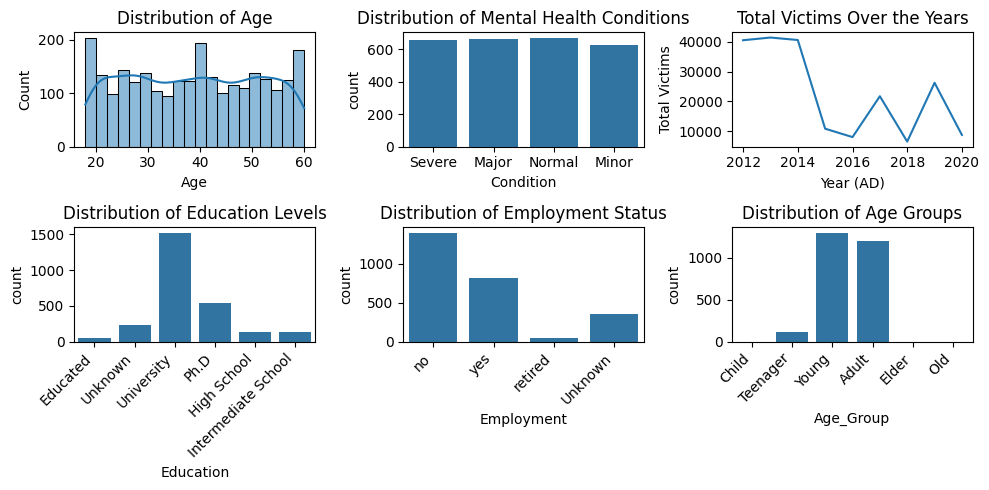

In [ ]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(10, 5))

# Plot the first subplot (histogram)
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')

# Plot the second subplot (countplot)
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Condition')
plt.title('Distribution of Mental Health Conditions')
plt.xlabel('Condition')

# Plot the third subplot (LinePlot)
plt.subplot(2, 3, 3)
sns.lineplot(data=df, x='Year_AD', y='Total_Victim', estimator='sum', errorbar=None)
plt.title('Total Victims Over the Years')
plt.xlabel('Year (AD)')
plt.ylabel('Total Victims')

# Plot the fourth subplot (countplot)
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Education')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45, ha='right')

# Plot the fifth subplot (countplot)
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Employment')
plt.title('Distribution of Employment Status')
plt.xticks(rotation=45, ha='right')

# Plot the sixth subplot (countplot)
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Age_Group')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Box plot

In [ ]:
# Box plot of Development Region and Total_Victims
fig1=px.box(df,x='Development_Region',y='Total_Victim',color='Condition',title='Box plot of Development_Region and Total_Victims in terms of condition')
fig1.show()

In [ ]:
# Box plot of Ecological_Belt and Age in term of condition
fig2=px.box(df,x='Ecological_Belt',y='Age',color='Condition',title='Box plot of Ecological_Belt and Age in term of condition')
fig2.show()

In [ ]:
# Box plot of Employment and Total_Victim in term of condition
fig3=px.box(df,x='Employment',y='Total_Victim',color='Condition',title='Box plot of Employment and Total_Victim in term of condition')
fig3.show()

In [ ]:
# Box plot of Education and Total_Victim in term of condition
fig4=px.box(df,x='Education',y='Total_Victim',color='Condition',title='Box plot of Education and Total_Victim in term of condition')
fig4.show()

### Pie-Chart

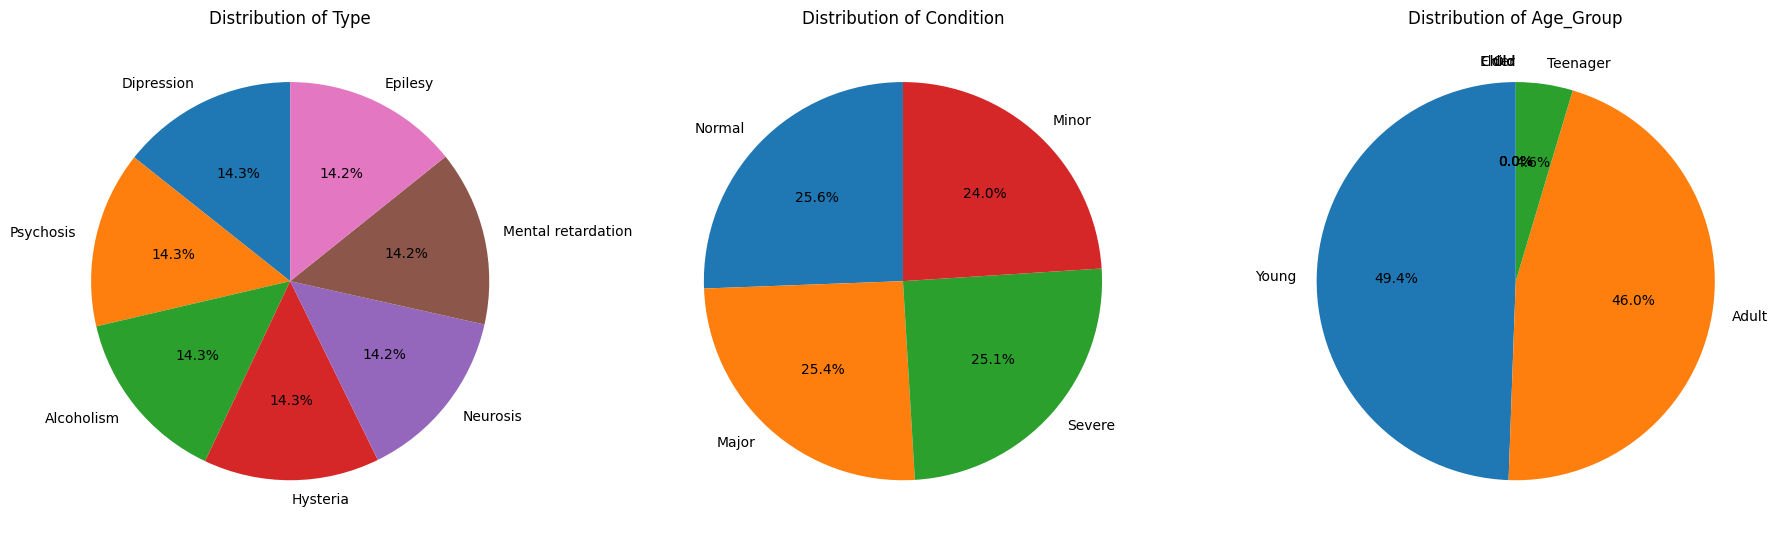

In [ ]:
# Assuming 'Type', 'Condition', and 'Age_Group' are columns in your DataFrame
type_counts = df['Type'].value_counts()
condition_counts = df['Condition'].value_counts()
age_group_counts = df['Age_Group'].value_counts()

# Create subplots with one row and three columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the pie chart for 'Type'
axs[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of Type')

# Plot the pie chart for 'Condition'
axs[1].pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of Condition')

# Plot the pie chart for 'Age_Group'
axs[2].pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Distribution of Age_Group')

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


### Bar Plot

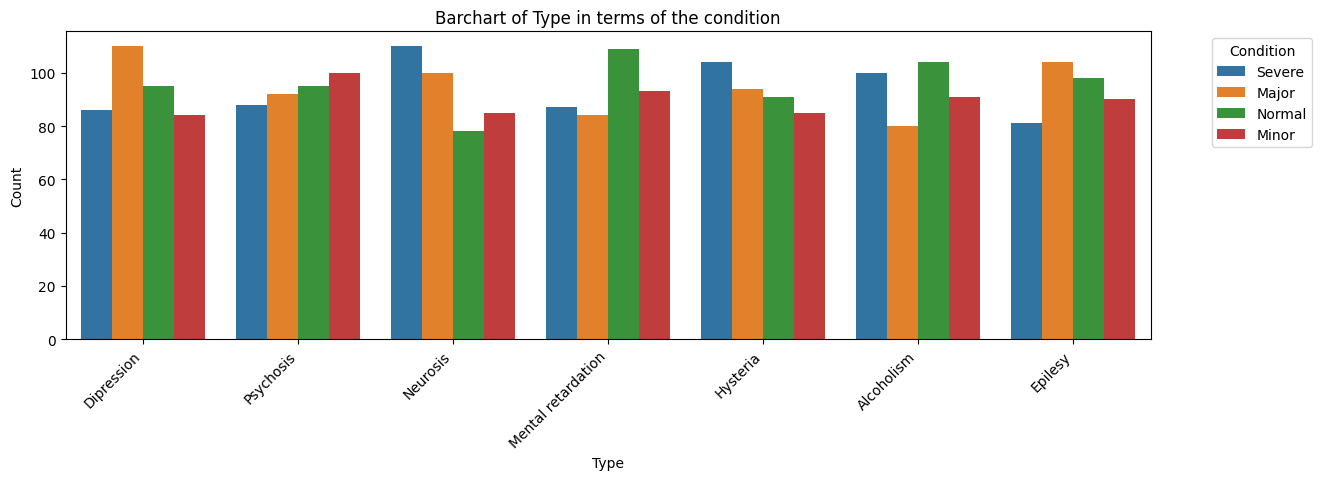

In [ ]:
# Barchart of Type in terms of the condition
plt.figure(figsize=(14, 4))
sns.countplot(data=df, x='Type', hue='Condition')
plt.title('Barchart of Type in terms of the condition')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

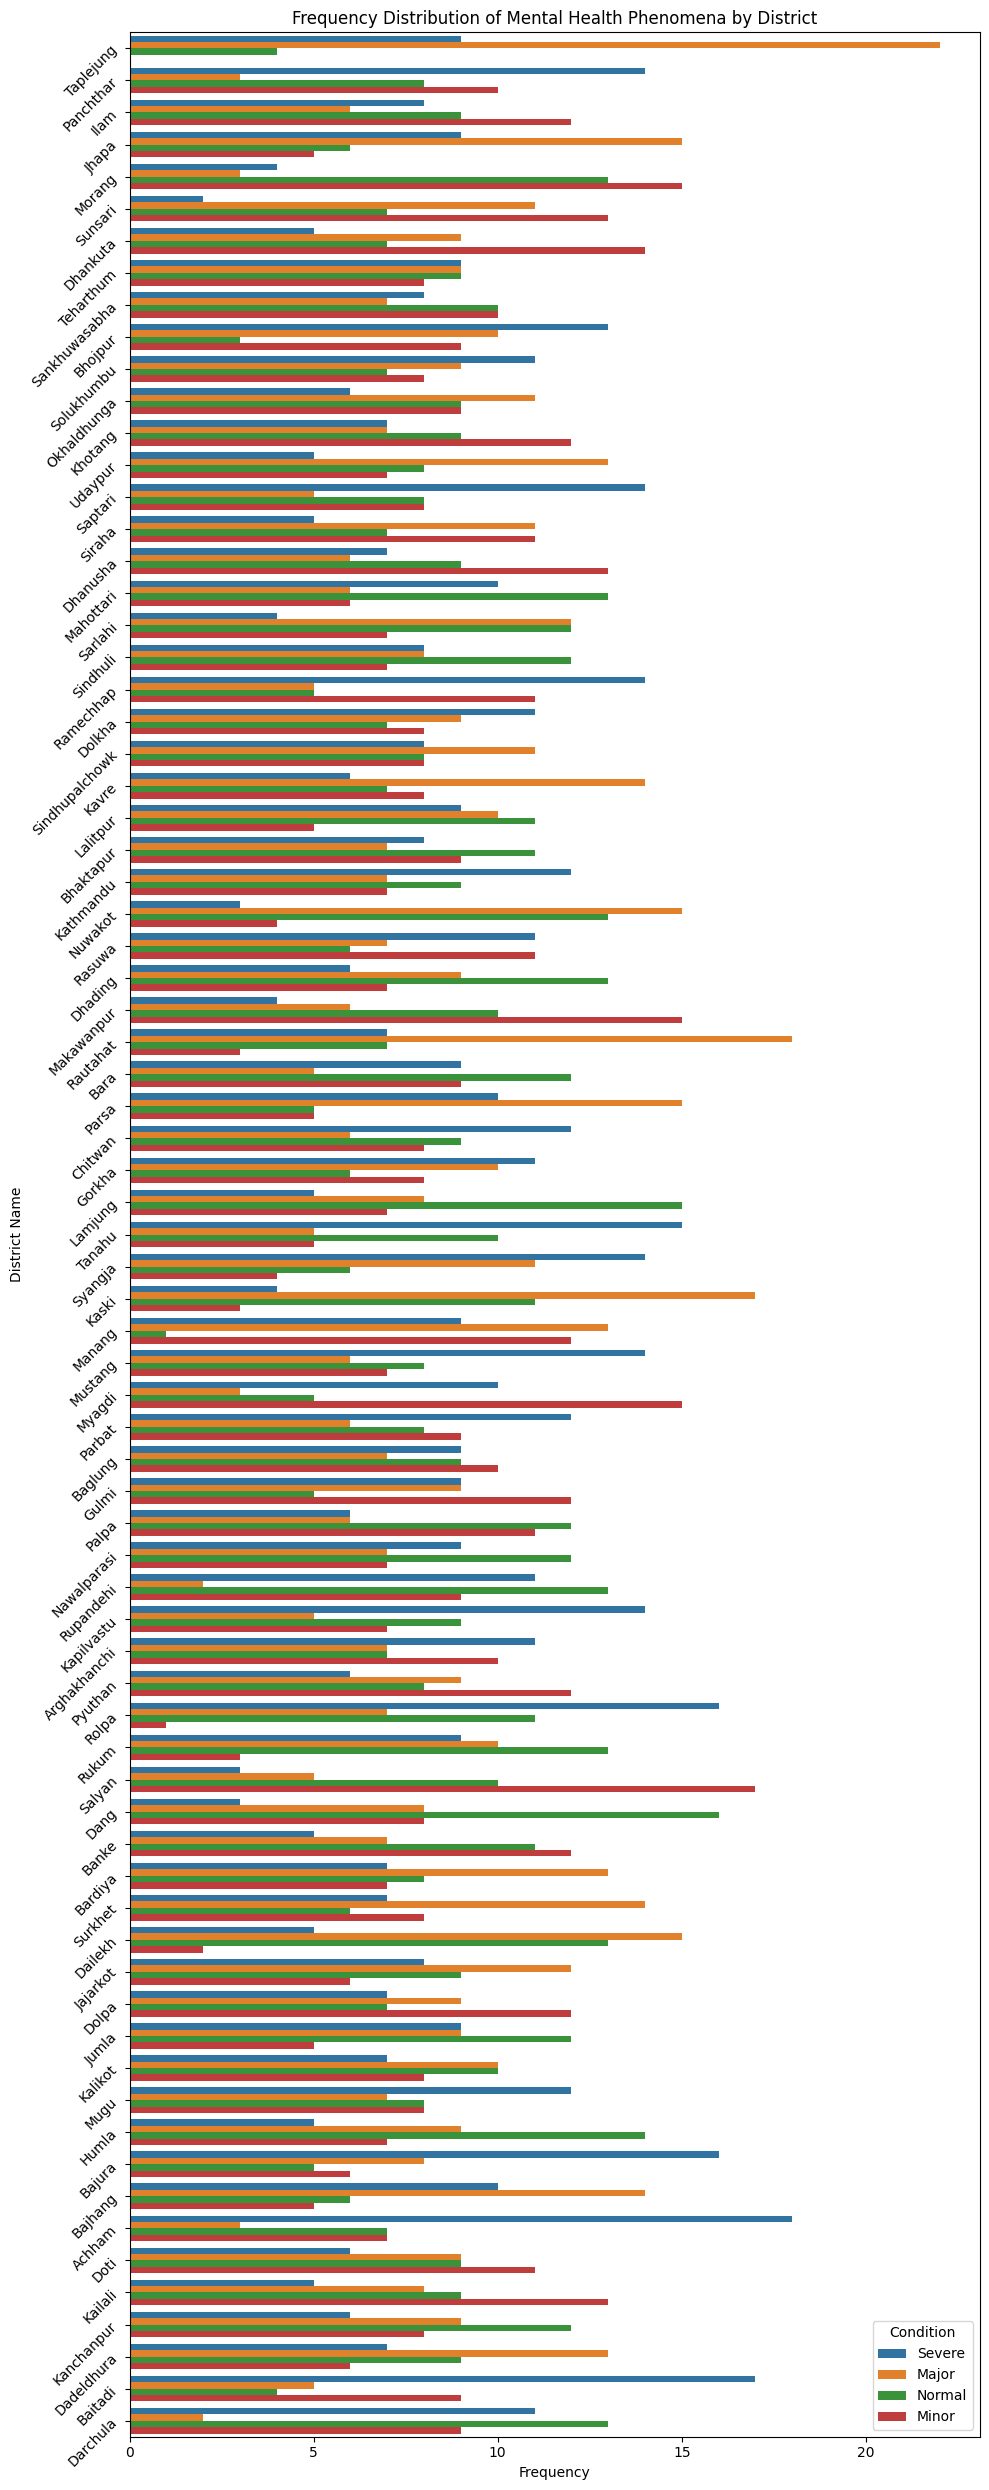

In [ ]:

plt.figure(figsize=(10, 25))  # Adjust the figure size for a vertical layout
sns.countplot(data=df, y='District_Name', hue='Condition')  # Set orient='v' for vertical orientation
plt.title('Frequency Distribution of Mental Health Phenomena by District')
plt.ylabel('District Name')  # Adjust ylabel to reflect y-axis orientation
plt.xlabel('Frequency')  # Adjust xlabel to reflect x-axis orientation

# Rotate y-axis labels for better readability
plt.yticks(rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Scatter Plot

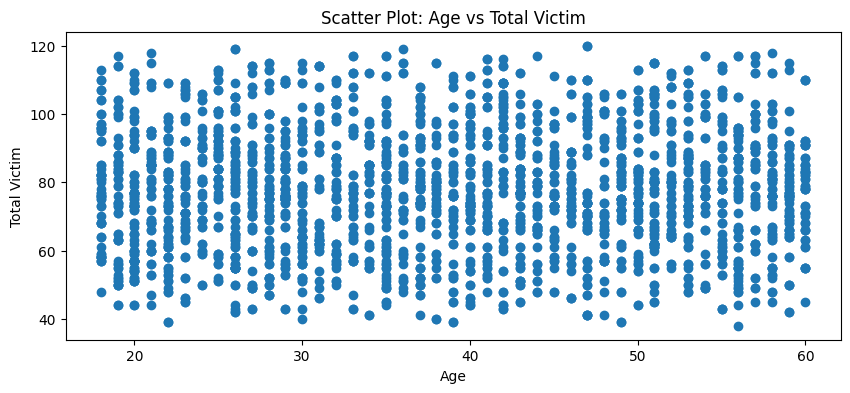

In [ ]:
# Plotting the Scatter Plot: Age vs Total Victim
plt.figure(figsize=(10, 4))
plt.scatter(df['Age'], df['Total_Victim'])
plt.title('Scatter Plot: Age vs Total Victim')
plt.xlabel('Age')
plt.ylabel('Total Victim')
plt.show()

As we can see there is no linarity in data

### KdePlot

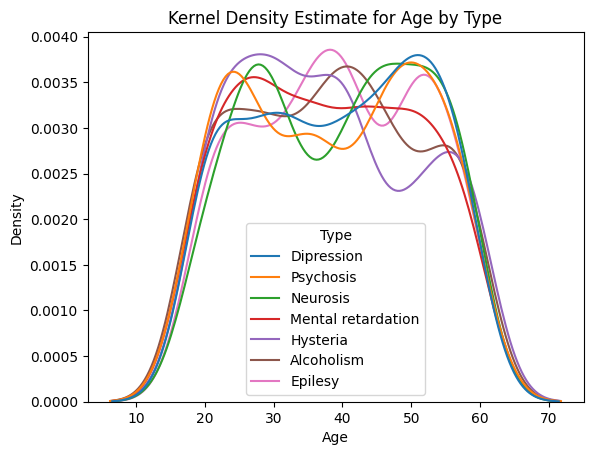

In [ ]:
# Kernel Density Estimate for Age by Type
#type and age
sns.kdeplot(data=df, x='Age', hue='Type')
# Add labels and title
plt.title('Kernel Density Estimate for Age by Type')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()

### scatter Geo_plot

In [ ]:
# defining the latitude and longtude for Nepal
center_lat = 28.3949
center_lon = 84.1240

# Create the scatter_geo plot with specified center and zoom
map_fig = px.scatter_geo(df,
                         lat='Latitude',
                         lon='Longitude',
                         projection='natural earth',
                         color='Total_Victim',
                         opacity=0.8,
                         hover_name='Development_Region',
                         hover_data=['District_Name', 'Zone']
                        )

# Customize the appearance of the map
# map_fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGrey")

# Set the center and zoom level
map_fig.update_geos(center=dict(lon=center_lon, lat=center_lat), projection_scale=20)

# Display the plot
map_fig.show()

### Encoding

In [ ]:
# Importing LabelEncoder for encoding the string datatypes

le=LabelEncoder()

In [ ]:
# Encoading all strings datatypes into Numerical datatypes
df['Zone']=le.fit_transform(df['Zone'])
df['Development_Region']=le.fit_transform(df['Development_Region'])
df['District_Name']=le.fit_transform(df['District_Name'])
df['Ecological_Belt']=le.fit_transform(df['Ecological_Belt'])
df['Condition']=le.fit_transform(df['Condition'])
df['Type']=le.fit_transform(df['Type'])
df['Education']=le.fit_transform(df['Education'])
df['Employment']=le.fit_transform(df['Employment'])
df['Age_Group']=le.fit_transform(df['Age_Group'])
df['Year_AD']=le.fit_transform(df['Year_AD'])

### Correlation Heatmap

In [ ]:
# Assuming df is your DataFrame
heatmap_fig = px.imshow(
    df.corr(),  # Use the correlation matrix directly
    x=df.columns,
    y=df.columns,
)

heatmap_fig.update_layout(
    title='Correlation Matrix',
    height=600,  # Adjust the height as needed
    width=800    # Adjust the width as needed
)

heatmap_fig.show()


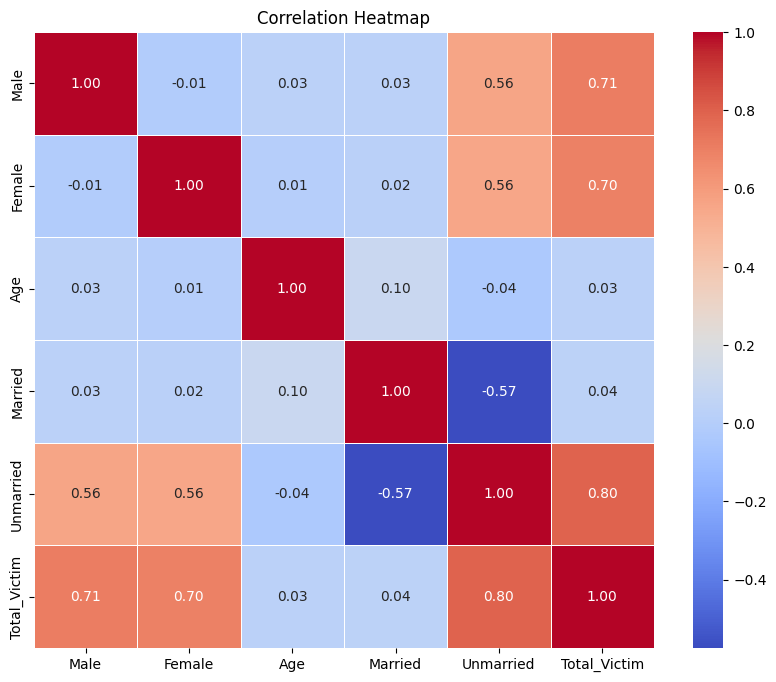

In [ ]:
# Assuming 'df' is your DataFrame
numeric_columns = df[['Male', 'Female', 'Age', 'Married', 'Unmarried', 'Total_Victim']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##**Machine learning Algorithms**


### **Spliting the random Values**

In [ ]:
# Define features (X) and target variable (y)
# X = df[['Male', 'Female', 'Age', 'Married', 'Unmarried', 'Education', 'Employment', 'Total_Victim', 'Age_Group', 'Ecological_Belt',	'Development_Region',	 'Type']]
X = df[['Male', 'Female', 'Age', 'Married', 'Unmarried',  'Total_Victim', ]]
y = df['Condition']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [ ]:
#Check X_train
X_train.head()

,Male,Female,Age,Married,Unmarried,Total_Victim
2533,18,51,36,23,46,69
2146,56,26,43,33,49,82
741,52,56,27,53,55,108
1966,37,23,57,35,25,60
1719,27,20,37,31,16,47


In [ ]:
#Check X_test
X_test.head()

,Male,Female,Age,Married,Unmarried,Total_Victim
381,51,22,44,21,52,73
831,18,55,20,25,48,73
1028,45,26,52,39,32,71
779,48,52,44,22,78,100
805,38,18,26,49,7,56


In [ ]:
#Check y_train
y_train.head()

2533    2
2146    1
741     2
1966    0
1719    0
Name: Condition, dtype: int64

In [ ]:
#Check y_test
y_test.head()

381     1
831     1
1028    2
779     2
805     0
Name: Condition, dtype: int64

### **Random Forest**

In [ ]:
# Initialize the Random Forest Classifier
clf1 = RandomForestClassifier(random_state=40)

In [ ]:
# Train the classifier on the training set
clf1.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [ ]:
# checking the accuracy of the model by giving x_test and y_test
score = clf1.score(X_test, y_test)
print("The accuracy of this model is " + str(score*100)+'%')


The accuracy of this model is 76.52671755725191%


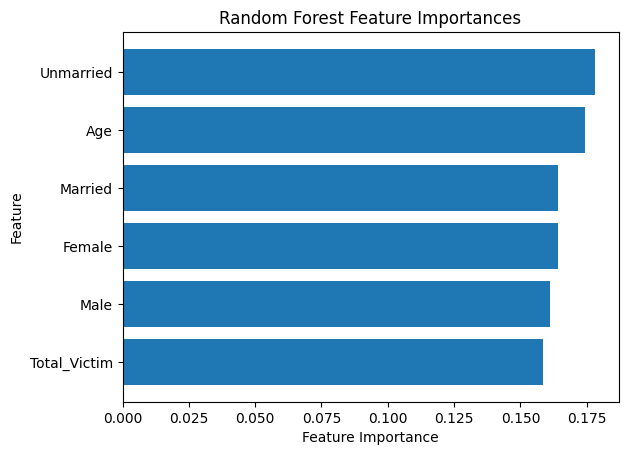

In [ ]:
# Get feature importances
feature_importances = clf1.feature_importances_

# Get feature names (assuming you have them in a list)
feature_names =['Male', 'Female', 'Age', 'Married', 'Unmarried',  'Total_Victim' ]


# Sort features based on importance
sorted_indices = np.argsort(feature_importances)

# Plotting the feature importances
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()


In [ ]:

# Assigning the classification_report into class_report and print it
y_pred = clf1.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       136
           1       0.74      0.72      0.73       120
           2       0.74      0.82      0.78       121
           3       0.82      0.73      0.77       147

    accuracy                           0.77       524
   macro avg       0.76      0.77      0.76       524
weighted avg       0.77      0.77      0.77       524



In [ ]:
# Plotting the Confusion Matrix
y_pred = clf1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix):
    fig = px.imshow(conf_matrix,
                    labels=dict(x="Predicted", y="Actual"),
                    x=['Normal', 'Major', 'Severe', 'Minor'],
                    y=['Normal', 'Major', 'Severe', 'Minor'],
                    color_continuous_scale='Blues',
                    title='Confusion Matrix Heatmap')
    fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()
plot_confusion_matrix(conf_matrix)

print(f'Confusion Matrix:\n{conf_matrix}')


Confusion Matrix:
[[108  16   8   4]
 [  6  87  14  13]
 [  9   6  99   7]
 [ 19   9  12 107]]


### **Logistic Regression**

In [ ]:
# Initialize the Logistic Regression model
clf2 = LogisticRegression(random_state=40)

In [ ]:
# Train the model on the training set
clf2.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [ ]:
# checking the accuracy
score = clf2.score(X_test, y_test)
print("The accuracy of this model is " + str(score*100)+"%")


The accuracy of this model is 26.908396946564885%


In [ ]:
# Assigning the classification_report into class_report and print it
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       136
           1       0.74      0.72      0.73       120
           2       0.74      0.82      0.78       121
           3       0.82      0.73      0.77       147

    accuracy                           0.77       524
   macro avg       0.76      0.77      0.76       524
weighted avg       0.77      0.77      0.77       524



In [ ]:
# Plotting the Confusion Matrix
y_pred = clf2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix):
    fig = px.imshow(conf_matrix,
                    labels=dict(x="Predicted", y="Actual"),
                    x=['Normal', 'Major', 'Severe', 'Minor'],
                    y=['Normal', 'Major', 'Severe', 'Minor'],
                    color_continuous_scale='Blues',
                    title='Confusion Matrix Heatmap')
    fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()
plot_confusion_matrix(conf_matrix)
print(f'Confusion Matrix:\n{conf_matrix}')


Confusion Matrix:
[[48 38 45  5]
 [37 48 34  1]
 [40 43 34  4]
 [48 49 39 11]]


### **Decision Tree**

In [ ]:
# Initialize the Decision Tree Classifier
clf3 = DecisionTreeClassifier(random_state=40)

In [ ]:
# Train the classifier on the training set
clf3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [ ]:
# Make predictions on the testing set
y_pred = clf3.predict(X_test)

In [ ]:
# Checking the Accuracy
score = clf3.score(X_test, y_test)
print("The accuracy of this model is " + str(score*100)+"%")


The accuracy of this model is 74.61832061068702%


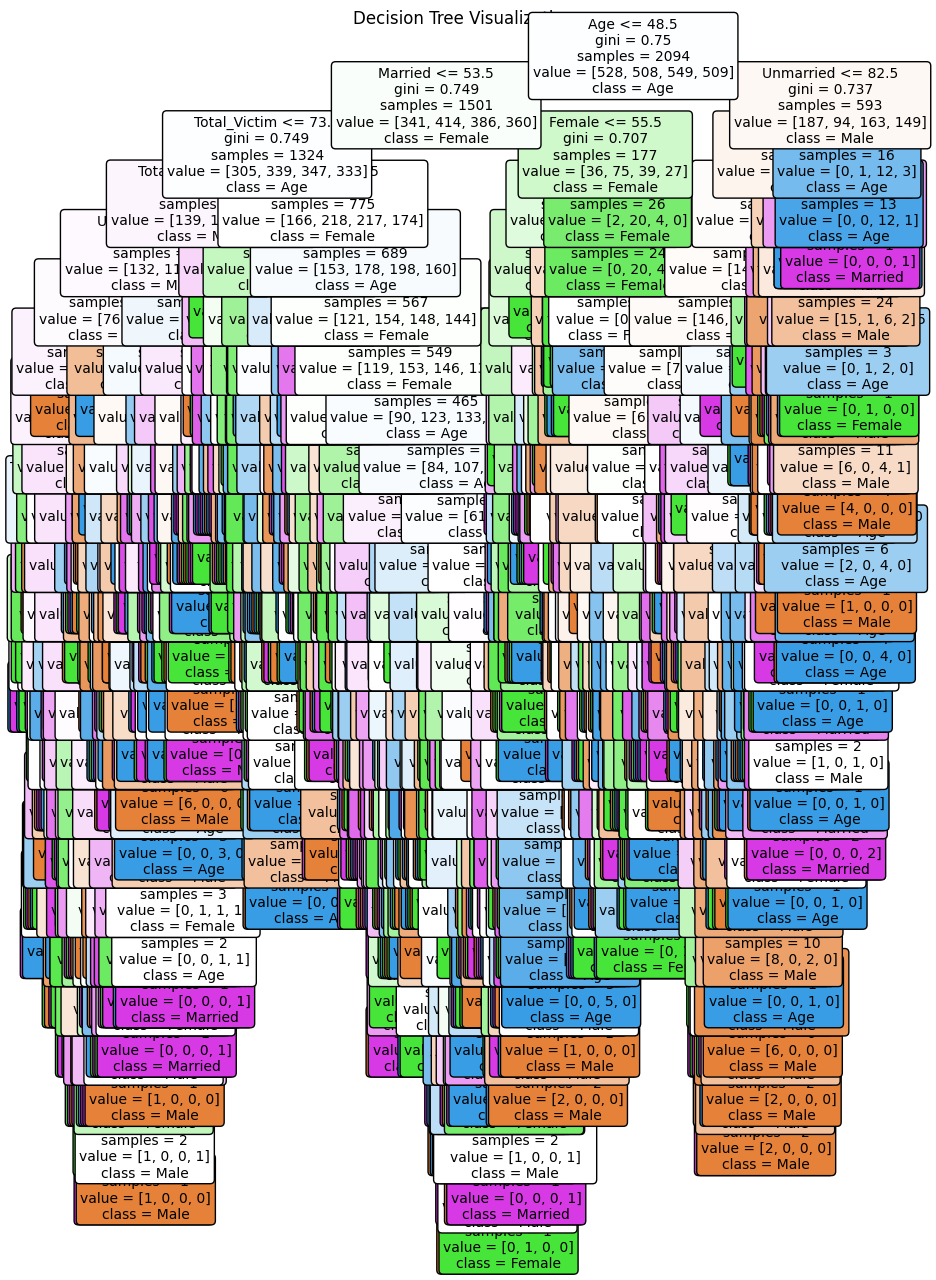

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(10, 16))
plot_tree(clf3, filled=True, feature_names=['Male', 'Female', 'Age', 'Married', 'Unmarried',  'Total_Victim' ],
          class_names=['Male', 'Female', 'Age', 'Married', 'Unmarried',  'Total_Victim'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()



In [ ]:
# Assigning the classification_report into class_report and print it
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       136
           1       0.76      0.72      0.74       120
           2       0.62      0.79      0.70       121
           3       0.81      0.75      0.78       147

    accuracy                           0.75       524
   macro avg       0.75      0.75      0.75       524
weighted avg       0.76      0.75      0.75       524



In [ ]:
# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix):
    fig = px.imshow(conf_matrix,
                    labels=dict(x="Predicted", y="Actual"),
                    x=['Normal', 'Major', 'Severe', 'Minor'],
                    y=['Normal', 'Major', 'Severe', 'Minor'],
                    color_continuous_scale='Blues',
                    title='Confusion Matrix Heatmap')
    fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()
plot_confusion_matrix(conf_matrix)

print(f'Confusion Matrix:\n{conf_matrix}')


Confusion Matrix:
[[ 99  12  21   4]
 [  4  87  15  14]
 [  8  10  95   8]
 [ 10   6  21 110]]




### **Gradient Boosting Machines - XGBoost**

In [ ]:
# Initialize the XGBoost Classifier
clf4 = XGBClassifier(random_state=40)

In [ ]:
# Train the classifier on the training set
clf4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions on the testing set
y_pred = clf4.predict(X_test)

In [ ]:
# Checking the accuracy
score = clf4.score(X_test, y_test)
print("The accuracy of this model is " + str(score*100)+"%")


The accuracy of this model is 76.90839694656488%


In [ ]:
# Assigning the classification_report into class_report and print it
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       136
           1       0.76      0.75      0.75       120
           2       0.76      0.83      0.79       121
           3       0.81      0.74      0.78       147

    accuracy                           0.77       524
   macro avg       0.77      0.77      0.77       524
weighted avg       0.77      0.77      0.77       524



In [ ]:
# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot confusion matrix heatmap
def plot_confusion_matrix(conf_matrix):
    fig = px.imshow(conf_matrix,
                    labels=dict(x="Predicted", y="Actual"),
                    x=['Normal', 'Major', 'Severe', 'Minor'],
                    y=['Normal', 'Major', 'Severe', 'Minor'],
                    color_continuous_scale='Blues',
                    title='Confusion Matrix Heatmap')
    fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()
plot_confusion_matrix(conf_matrix)
print(f'Confusion Matrix:\n{conf_matrix}')


Confusion Matrix:
[[104  16   7   9]
 [  8  90  11  11]
 [ 10   6 100   5]
 [ 18   7  13 109]]
